In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 19 ##

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [7]:
smoking_and_birthweight = baby.select('Birth Weight', 'Maternal Smoker')
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [9]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


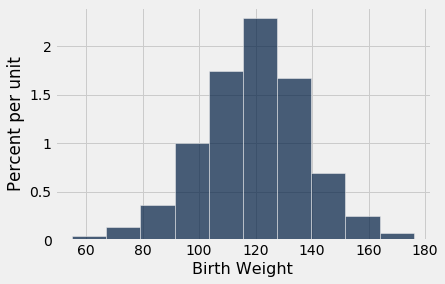

In [10]:
smoking_and_birthweight.hist('Birth Weight')

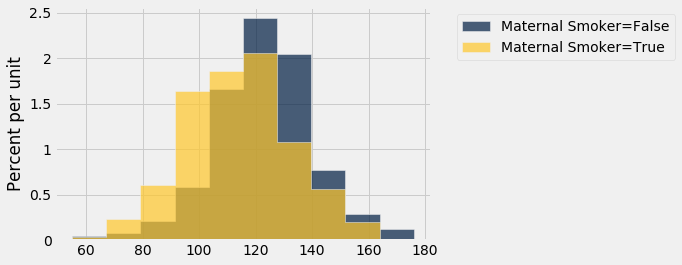

In [6]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [ ]:
baby = Table.read_table('baby.csv')
baby

In [ ]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')

In [ ]:
smoking_and_birthweight.group('Maternal Smoker')

In [ ]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

In [ ]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

In [ ]:
means = means_table.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

In [ ]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

In [ ]:
weights.sample(with_replacement = False)

In [ ]:
shuffled_weights = weights.sample(with_replacement = False).column(0)

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Birth Weight', shuffled_weights
)

In [ ]:
original_and_shuffled

In [ ]:
original_and_shuffled.group('Maternal Smoker', np.average)

In [ ]:
group_labels = baby.select('Maternal Smoker')
group_labels

In [ ]:
shuffled_weights = weights.sample(with_replacement = False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
means_tbl = shuffled_tbl.group(0, np.average)
means_tbl.column(1).item(0) - means_tbl.column(1).item(1)

In [ ]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means_tbl = shuffled_tbl.group(0, np.average)
    new_diff = means_tbl.column(1).item(0) - means_tbl.column(1).item(1)
    differences = np.append(differences, new_diff)

In [ ]:
Table().with_column('Difference Between Means', differences).hist(bins = 20)

In [ ]:
observed_difference

## Deflategate ##

In [ ]:
football = Table.read_table('deflategate.csv')
football.show()

In [ ]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1)+football.column(2))/2
    )
football.show()

In [ ]:
np.ones(5)

In [ ]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

In [ ]:
drop_values = start - football.column(1)

In [ ]:
football = football.drop('Combined').with_column('Drop', drop_values)

In [ ]:
football.show()

In [ ]:
means = football.group('Team', np.average)
means

In [ ]:
observed_difference = means.column(1).item(1) - means.column(1).item(0)
observed_difference

In [ ]:
group_labels = football.select('Team')
drops = football.select('Drop')

In [ ]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drops.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means_tbl = shuffled_tbl.group(0, np.average)
    new_diff = means_tbl.column(1).item(0) - means_tbl.column(1).item(1)
    differences = np.append(differences, new_diff)

In [ ]:
Table().with_column('Difference Between Means', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=40);

In [ ]:
np.count_nonzero(differences >= observed_difference) / 20000